In [1]:
import torch

## torch.tensor 인수
#### data
- 배열
#### dtype
- 데이터를 저장할 자료형

1. 논리형

||||
|-|-|-|
| 논리형 8비트 | torch.bool | True, False |

2. 정수형

||||
|-|-|-|
| 정수형 8비트 | torch.int or torch.char | $-2^7$ ~ $2^7-1$ |
| 정수형 16비트 | torch.int16 or torch.short | $-2^15$ ~ $2^15-1$ |
| 정수형 32비트 | torch.int32 or torch.int | $-2^31$ ~ $2^31-1$ |
| 정수형 64비트 | torch.int64 or torch.long | $-2^63$ ~ $2^63-1$ |

3. 실수형

||||
|-|-|-|
| 실수형 16비트 | torch.float16 or torch.half | $±5.96×10^-8$ ~ $±6.55×10^4$ |
| 실수형 32비트 | torch.float32 or torch.float | $±1.40×10^-45$ ~ $±3.40×10^38$ |
| 실수형 64비트 | torch.float64 or torch.double | $±4.94×10^-324$ ~ $±1.79×10^308$ |

#### device
- 기기 설정(cpu, cpu)

#### requires_grad
- 텐서에 대한 기울기를 저장할지 결정

In [4]:
x_1 = torch.Tensor(2,3) #2x3 난수로 이루어진 파이토치 텐서 생성
x_2 = torch.tensor([[1,2,3],[4,5,6]]) #2x3 파이토치 텐서 생성
print(x_1)
print(x_2)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [10]:
x_f = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32) #float32 타입의 텐서 생성
x_d = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float64) #float64 타입의 텐서 생성
x_b = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int8) #uint8 타입의 텐서 생성
print(x_f)
print(x_d)
print(x_b)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int8)


In [33]:
x = torch.tensor(data=[2.0,3.0], requires_grad=True) #미분 가능 텐서 생성
y = x**2 #y=[4.0,9.0]
z = 2*y + 3 #z=[11.0,21.0]
target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target)) #loss = |11-3| + |21-4| = 25.0
loss.backward()

print(x.grad, z.grad_fn) # z=x^2+3 의 미분값, 

tensor([ 8., 12.]) <AddBackward0 object at 0x000001DC27A952A0>


In [49]:
import torch
import torch.nn as nn # 신경망 모델(Linear)
import torch.optim as optim # 옵티마이저(경사하강법)
import torch.nn.init as init # 텐서에 초기값 주기

num_data = 1000
num_epoch = 500

# uniform: 균등
# -10~10까지 균등하게 [num_data,1]크기의 텐서 생성([-10~10 사이의 수]×1000개)
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)

# 실제 데이터는 균일하지 않기 때문에 현실성 반영을 위한 노이즈 생성
# torch.init.normal_: 정규분포 생성
# [num_data, 1] 크기의 평균 0, 표준편차 1인 텐서 생성
noise = init.normal_(torch.FloatTensor(num_data,1), std=1)

In [50]:
y = 2*x+3
y_noise = y + noise

#### nn.Linear 선형함수
- $y=w_1x_1 + w_2x_2 + ... + b$
- 초기 w와b 값은 임의의 값으로 설정

#### L1Loss(Mean Absolute Error, MAE)
- $MAE = \frac{1}{N}\displaystyle\sum_{t=1}^{N}{\vert y_i - \hat{y_i} \vert}$
- Robustness: 이상치가 많은 데이터에 적합
- Sparsity: L1정규화를 하는 경우 일부 가중치를 0으로 만들어 특징 선택에 유리하다.
- 미분 가능하지 않은 지점이 존재한다. -> 최적화 과정에서 문제 가능성

#### L2Loss(Mean Squared Error, MSE)
- $MSE = \frac{1}{N}\displaystyle\sum_{t=1}^{N}{(y_i - \hat{y_i})^{2}}$
- Sensitivity: 이상치에 민감(큰 오차에 큰 패널티)
- 계산 편의성: 미분 가능한 곳이 많아 최적화에 용이

#### SGD(Stochastic Gradient Descent)
- 확률적 경사하강법
- 각 Batch에서 랜덤한 확률로 1개의 데이터를 추출해 Gradient Descent 수행

### Mini Batch Gradient Descent
- Batch의 모든 데이터들이 Optimize 과정에 사용
- pytorch의 SGD는 사실 Mini Batch Gradient Descent



In [ ]:
# torch.nn.Linear(input, output)
# 입력과 출력의 특성이 1개
model = nn.Linear(1,1)

# 모델의 출력값과 y_noise의 오차를 계산하는 손실함수
# L1Loss: 평균 절대 오차
loss_func = nn.L1Loss()

# opimizer: 최적화 함수
# 여기서는 SGD(stochastic gradient descent) 사용
# SGD: 한 번에 들어오는 수대로 경사하강법을 적용
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 선형 회귀 분석
- z = x × w + b의 직선 함수에서 w와 b를 찾는 과정
- 모델의 output과 label을 손실 함수에 넣고 그 결과가 작아지는 쪽으로 가중치와 편향을 업데이트

In [53]:
label = y_noise

for i in range(num_epoch):
    # zero_grad(): 기울기를 0으로 초기화(다음 epoch때 새로운 기울기를 구하기 위해)
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:
        print(f"epoch{i}: {loss.data}")
        param_list = list(model.parameters())
        print(f"weight: {param_list[0].data}, bias: {param_list[1].data}")


# parameters(): 모델의 파라미터(가중치, 편향)들을 반환
# parameters[0]: 가중치, parameters[1]: 편향 -> 2.0019, 2.9086 (2,3에 가까운 값)

#print(param_list[0].item(), param_list[1].item())

epoch0: 0.8373180031776428
weight: tensor([[1.9900]]), bias: tensor([2.8793])
epoch100: 0.835016131401062
weight: tensor([[1.9894]]), bias: tensor([2.9261])
epoch200: 0.834199845790863
weight: tensor([[1.9865]]), bias: tensor([2.9540])
epoch300: 0.8340947031974792
weight: tensor([[1.9855]]), bias: tensor([2.9633])
epoch400: 0.8340680003166199
weight: tensor([[1.9850]]), bias: tensor([2.9681])


### 최소제곱법(Least Square Method)/평균 제곱 오차(Mean Square Error)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

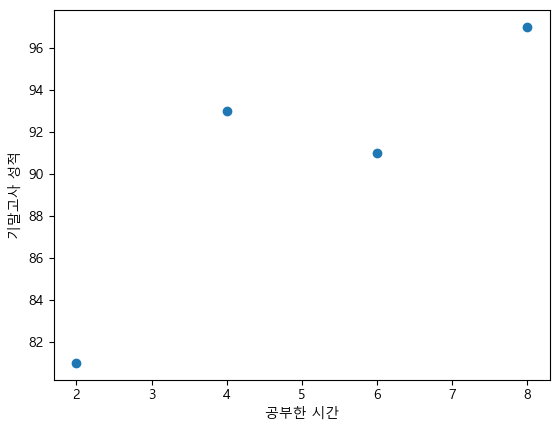

In [15]:
X = [2,4,6,8]
Y = [81,93,91,97]

plt.scatter(X,Y)
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

In [16]:
mx = np.mean(X)
my = np.mean(Y)

divisor = sum([(i-mx)**2 for i in X])

def top(X, mx, Y, my):
    d = 0
    for i in range(len(X)):
        d += (X[i] - mx)*(Y[i] - my)
    return d

dividend = top(X, mx, Y, my)

a = dividend / divisor
b = my - (mx*a)

In [17]:
a, b

(2.3, 79.0)

In [18]:
X = np.array(X)
Y = np.array(Y)

predict = a*X + b
predict

array([83.6, 88.2, 92.8, 97.4])

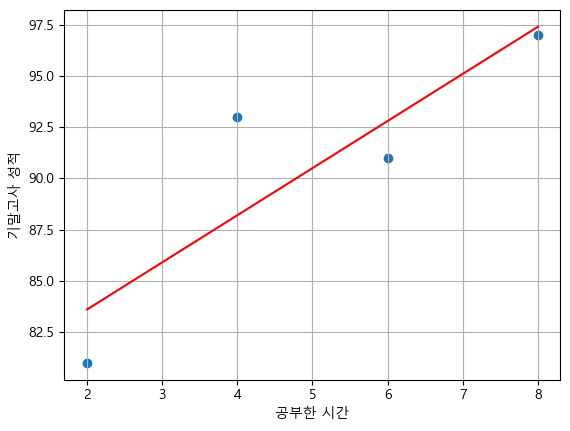

In [19]:
plt.scatter(X, Y)
plt.plot(X, predict, c='r')
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.grid()
plt.show()

In [21]:
predict, Y

(array([83.6, 88.2, 92.8, 97.4]), array([81, 93, 91, 97]))

In [24]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

mse(predict, Y)

8.299999999999985

#### 실습

In [27]:
X = np.array([1., 2., 3., 4., 5., 6.])
Y = np.array([9., 16., 23., 30., 37., 44.])

w = 0.0
b = 0.0

In [ ]:
n_data = len(X)
epoch = 5000
lr = 0.01

In [29]:
for i in range(epoch):
    y_predict = X*w + b

    loss = np.sum((y_predict-Y)**2 / n_data)

    w -= lr * ((y_predict-Y)*X).mean()
    b -= lr * (y_predict-Y).mean()

    if i%100 == 0:
        print('Epoch ({:10d}/{:10d}) loss: {: .3f}, w: {:.3f}, b: {:.3f}'.format(i, epoch, loss, w, b))

Epoch (         0/      5000) loss:  845.167, w: 1.132, b: 0.265
Epoch (       100/      5000) loss:  0.016, w: 7.067, b: 1.712
Epoch (       200/      5000) loss:  0.011, w: 7.056, b: 1.760
Epoch (       300/      5000) loss:  0.008, w: 7.047, b: 1.800
Epoch (       400/      5000) loss:  0.005, w: 7.039, b: 1.834
Epoch (       500/      5000) loss:  0.004, w: 7.032, b: 1.861
Epoch (       600/      5000) loss:  0.003, w: 7.027, b: 1.885
Epoch (       700/      5000) loss:  0.002, w: 7.022, b: 1.904
Epoch (       800/      5000) loss:  0.001, w: 7.019, b: 1.920
Epoch (       900/      5000) loss:  0.001, w: 7.016, b: 1.933
Epoch (      1000/      5000) loss:  0.001, w: 7.013, b: 1.944
Epoch (      1100/      5000) loss:  0.000, w: 7.011, b: 1.954
Epoch (      1200/      5000) loss:  0.000, w: 7.009, b: 1.961
Epoch (      1300/      5000) loss:  0.000, w: 7.008, b: 1.968
Epoch (      1400/      5000) loss:  0.000, w: 7.006, b: 1.973
Epoch (      1500/      5000) loss:  0.000, w: 7.005,

## 다중 선형 회귀
- 독립 변수가 1개가 아닌 여러개

#### 예제

Quiz1(x1)|Quiz2(x2)|Quiz3(x3)|Final(y)
---|---|---|---
73|80|75|152
93|88|93|185
89|91|80|180
96|98|100|196
73|66|70|142

수식: $H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [32]:
torch.manual_seed(1)

In [42]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [43]:
optimizer = optim.SGD([W, b], lr=1e-5)
epochs = 1000

In [44]:
for i in range(epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if i%100==0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
            i, epochs, hypothesis.squeeze().detach(), cost.item()))


Epoch    0/1000 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch  100/1000 hypothesis: tensor([154.0433, 185.0925, 175.8312, 198.5701, 141.2221]) Cost: 5.754568
Epoch  200/1000 hypothesis: tensor([154.0278, 185.0649, 175.9335, 198.5128, 141.2284]) Cost: 5.512375
Epoch  300/1000 hypothesis: tensor([154.0120, 185.0385, 176.0329, 198.4569, 141.2353]) Cost: 5.281663
Epoch  400/1000 hypothesis: tensor([153.9960, 185.0133, 176.1295, 198.4022, 141.2426]) Cost: 5.061868
Epoch  500/1000 hypothesis: tensor([153.9797, 184.9892, 176.2233, 198.3488, 141.2504]) Cost: 4.852397
Epoch  600/1000 hypothesis: tensor([153.9632, 184.9662, 176.3143, 198.2966, 141.2586]) Cost: 4.652731
Epoch  700/1000 hypothesis: tensor([153.9465, 184.9442, 176.4028, 198.2456, 141.2672]) Cost: 4.462276
Epoch  800/1000 hypothesis: tensor([153.9296, 184.9232, 176.4888, 198.1958, 141.2762]) Cost: 4.280613
Epoch  900/1000 hypothesis: tensor([153.9126, 184.9032, 176.5724, 198.1471, 141.2855]) Cost: 4.107294


#### torch.no_grad(): 역전파를 통한 가중치 업데이트 비활성화

In [46]:
with torch.no_grad():
    new_input = torch.FloatTensor([75, 85, 72])
    prediction = new_input.matmul(W) + b
    print('Predicted value for input {}: {}'.format(new_input.squeeze().tolist(), prediction.item()))
    

Predicted value for input [75.0, 85.0, 72.0]: 157.2527618408203


#### nn.Module과 클래스로 구현
- 학습률이 모델의 필요한 크기보다 높을 때 기울기가 발산
- 이 모델의 경우 0.01로 하면 발산하기 때문에 0.00001로 설정

In [52]:
model = nn.Linear(3,1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [53]:
for i in range(epochs):
    prediction = model(x_train)
    cost = loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if i%100==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          i, epochs, cost.item()
      ))

Epoch    0/1000 Cost: 19207.734375
Epoch  100/1000 Cost: 7.081053
Epoch  200/1000 Cost: 6.737222
Epoch  300/1000 Cost: 6.412410
Epoch  400/1000 Cost: 6.105474
Epoch  500/1000 Cost: 5.815417
Epoch  600/1000 Cost: 5.541060
Epoch  700/1000 Cost: 5.281559
Epoch  800/1000 Cost: 5.035924
Epoch  900/1000 Cost: 4.803430


#### 미니배치

In [57]:
from torch.utils.data import TensorDataset, DataLoader

In [58]:
x_train, y_train

(tensor([[ 73.,  80.,  75.],
         [ 93.,  88.,  93.],
         [ 89.,  91.,  80.],
         [ 96.,  98., 100.],
         [ 73.,  66.,  70.]]),
 tensor([[152.],
         [185.],
         [180.],
         [196.],
         [142.]]))

In [59]:
dataset = TensorDataset(x_train, y_train)

In [64]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [65]:
for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)

0
[tensor([[93., 88., 93.],
        [73., 66., 70.]]), tensor([[185.],
        [142.]])]
1
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  80.]]), tensor([[196.],
        [180.]])]
2
[tensor([[73., 80., 75.]]), tensor([[152.]])]


In [66]:
for epoch in range(epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)
        cost = loss(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch%100==0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/1000 Batch 1/3 Cost: 1.190516
Epoch    0/1000 Batch 2/3 Cost: 10.872515
Epoch    0/1000 Batch 3/3 Cost: 0.065792
Epoch  100/1000 Batch 1/3 Cost: 1.893964
Epoch  100/1000 Batch 2/3 Cost: 0.821349
Epoch  100/1000 Batch 3/3 Cost: 18.208055
Epoch  200/1000 Batch 1/3 Cost: 1.943691
Epoch  200/1000 Batch 2/3 Cost: 0.817415
Epoch  200/1000 Batch 3/3 Cost: 15.148957
Epoch  300/1000 Batch 1/3 Cost: 1.439837
Epoch  300/1000 Batch 2/3 Cost: 6.746035
Epoch  300/1000 Batch 3/3 Cost: 0.026972
Epoch  400/1000 Batch 1/3 Cost: 2.824184
Epoch  400/1000 Batch 2/3 Cost: 1.887078
Epoch  400/1000 Batch 3/3 Cost: 9.157144
Epoch  500/1000 Batch 1/3 Cost: 4.728671
Epoch  500/1000 Batch 2/3 Cost: 1.112719
Epoch  500/1000 Batch 3/3 Cost: 0.062729
Epoch  600/1000 Batch 1/3 Cost: 3.588654
Epoch  600/1000 Batch 2/3 Cost: 1.496475
Epoch  600/1000 Batch 3/3 Cost: 2.324490
Epoch  700/1000 Batch 1/3 Cost: 3.360467
Epoch  700/1000 Batch 2/3 Cost: 1.210098
Epoch  700/1000 Batch 3/3 Cost: 0.133017
Epoch  800/10

In [67]:
with torch.no_grad():
    new_var = torch.FloatTensor([[73,80,75]])
    pred_y = model(new_var)
    print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.4206]])
